In [1]:
#Weatherbench P.2

In [1]:
import apache_beam

In [2]:
import numpy as np

In [3]:
import os

In [4]:
import weatherbench2
import xarray as xr

In [5]:
import math

In [6]:
forecast_path = 'gs://weatherbench2/datasets/hres/2016-2022-0012-64x32_equiangular_conservative.zarr'
obs_path = 'gs://weatherbench2/datasets/era5/1959-2022-6h-64x32_equiangular_conservative.zarr'
climatology_path = 'gs://weatherbench2/datasets/era5-hourly-climatology/1990-2019_6h_64x32_equiangular_conservative.zarr'

In [7]:
climatology = xr.open_zarr(climatology_path)
climatology

<xarray.Dataset>
Dimensions:                                         (hour: 4, dayofyear: 366,
                                                     longitude: 64,
                                                     latitude: 32, level: 13)
Coordinates:
  * dayofyear                                       (dayofyear) int64 1 ... 366
  * hour                                            (hour) int64 0 6 12 18
  * latitude                                        (latitude) float64 -87.19...
  * level                                           (level) int64 50 ... 1000
  * longitude                                       (longitude) float64 0.0 ....
Data variables: (12/53)
    10m_u_component_of_wind                         (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    10m_v_component_of_wind                         (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    10m_wind_speed                                  (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    2m_dewpoint_temperature                         (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    2m_temperature                                  (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    above_ground                                    (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>
    ...                                              ...
    volumetric_soil_water_layer_1                   (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    volumetric_soil_water_layer_2                   (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    volumetric_soil_water_layer_3                   (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    volumetric_soil_water_layer_4                   (hour, dayofyear, longitude, latitude) float32 dask.array<chunksize=(4, 366, 64, 32), meta=np.ndarray>
    vorticity                                       (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>
    wind_speed                                      (hour, dayofyear, level, longitude, latitude) float32 dask.array<chunksize=(4, 366, 13, 64, 32), meta=np.ndarray>

In [ ]:
##Testing on even smaller 1d date
#Continued on WeatherBenchW2

from weatherbench2.regions import SliceRegion, ExtraTropicalRegion
from weatherbench2.evaluation import evaluate_in_memory
from weatherbench2 import config
from weatherbench2.metrics import MSE, ACC

paths1 = config.Paths(
    forecast=forecast_path,
    obs=obs_path,
    output_dir='./',   # Directory to save evaluation results
)

selection1 = config.Selection(
    variables=[
        'geopotential',
    ],
    levels=[500],
    time_slice=slice('2020-01-01', '2020-12-31'),
)

#https://weatherbench2.readthedocs.io/en/latest/init-vs-valid-time.html

#by init-time is set to true. (offical convention is init time true)
#
data_config1 = config.Data(selection=selection1, paths=paths1)

regions1 = {
    'global': SliceRegion(),
    #'tropics': SliceRegion(lat_slice=slice(-10, 10)),
    #'extra-tropics': ExtraTropicalRegion(),
}

eval_configs1 = {
  'deterministicsmalltest': config.Eval(
      metrics={
          'mse': MSE(),
          #'acc': ACC(climatology=climatology) 
      },
      regions=regions1
  )
}


evaluate_in_memory(data_config1, eval_configs1)



In [146]:
results = xr.open_dataset('./deterministicsmalltest.nc')
results




<xarray.Dataset>
Dimensions:       (lead_time: 41, region: 1, metric: 1, level: 1)
Coordinates:
  * lead_time     (lead_time) timedelta64[ns] 0 days 00:00:00 ... 10 days 00:...
  * region        (region) object 'global'
  * metric        (metric) object 'mse'
  * level         (level) int32 500
Data variables:
    geopotential  (metric, region, lead_time, level) float64 ...

In [158]:
leadtrue = results['geopotential']
leadtrue[0,0,:,0].values

array([5.24170483e+02, 4.97454895e+02, 1.03091648e+03, 1.03016873e+03,
       1.76827782e+03, 2.03027457e+03, 3.21184755e+03, 3.90278466e+03,
       5.58552620e+03, 6.83367337e+03, 9.45787348e+03, 1.16435743e+04,
       1.55987561e+04, 1.92291128e+04, 2.49300264e+04, 3.04311393e+04,
       3.85501098e+04, 4.64172527e+04, 5.73736502e+04, 6.82692969e+04,
       8.23327166e+04, 9.62770632e+04, 1.13742191e+05, 1.31081855e+05,
       1.52276297e+05, 1.73156767e+05, 1.97812150e+05, 2.21829931e+05,
       2.49627266e+05, 2.76054276e+05, 3.05749609e+05, 3.34062576e+05,
       3.65618779e+05, 3.95114041e+05, 4.26826580e+05, 4.55806308e+05,
       4.86726017e+05, 5.14979569e+05, 5.45780111e+05, 5.73745537e+05,
       6.03819242e+05])

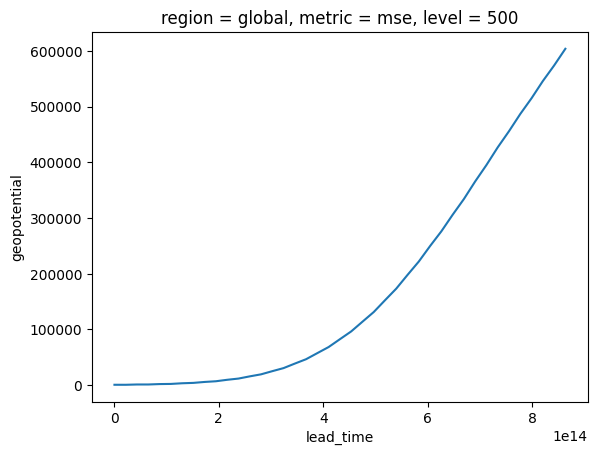

In [114]:
results['geopotential'].plot()


#results['geopotential'].sel(metric='rmse', level=500, region='global').plot()

In [164]:
forecast = xr.open_zarr(forecast_path)
observations = xr.open_zarr(obs_path)

In [ ]:
a =forecast['geopotential'].sel(level = 500, time = slice('2020-01-01', '2020-12-31'))[:,0,:,:]
b = observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))[::2,:,:]

test = a.to_numpy() - b.to_numpy()
np.sum(test**2/(64*32*732))

#errors = a-b

#print(errors)
#test = errors.values

#real = test**2
#real.shape
#np.sum(test**2/(64*32*732))
#np.sum(test**2)/(64*32*732)

#latitude weights

52235.25313743817

In [183]:
#Relevant code functions
import typing as t
from weatherbench2.regions import Region

def _spatial_average(
    dataset: xr.Dataset,
    region: t.Optional[Region],
    skipna: bool,
) -> xr.Dataset:
  """Compute spatial average after applying region mask.

  Args:
    dataset: Metric dataset as a function of latitude/longitude.
    region: Region object (optional).
    skipna: Skip NaNs in spatial mean.

  Returns:
    dataset: Spatially averaged metric.
  """
  weights = get_lat_weights(dataset)
  if region is not None:
    dataset, weights = region.apply(dataset, weights)
    # ignore NaN/Inf values in regions with zero weight
    dataset = dataset.where(weights > 0, 0)
  return dataset.weighted(weights).mean(
      ["latitude", "longitude"], skipna=skipna
  )

def _assert_increasing(x: np.ndarray):
  if not (np.diff(x) > 0).all():
    raise ValueError(f"array is not increasing: {x}")


def _latitude_cell_bounds(x: np.ndarray) -> np.ndarray:
  pi_over_2 = np.array([np.pi / 2], dtype=x.dtype)
  return np.concatenate([-pi_over_2, (x[:-1] + x[1:]) / 2, pi_over_2])


def _cell_area_from_latitude(points: np.ndarray) -> np.ndarray:
  """Calculate the area overlap as a function of latitude."""
  bounds = _latitude_cell_bounds(points)
  _assert_increasing(bounds)
  upper = bounds[1:]
  lower = bounds[:-1]
  # normalized cell area: integral from lower to upper of cos(latitude)
  return np.sin(upper) - np.sin(lower)


def get_lat_weights(ds: xr.Dataset) -> xr.DataArray:
  """Computes latitude/area weights from latitude coordinate of dataset."""
  weights = _cell_area_from_latitude(np.deg2rad(ds.latitude.data))
  weights /= np.mean(weights)
  weights = ds.latitude.copy(data=weights)
  return weights



In [189]:

a = forecast['geopotential'].sel(level = 500, time = slice('2020-01-01', '2020-12-31'))[:,:,:,:]
b = observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))[::2,:,:]


_spatial_average(
        (forecast - observations) ** 2, region='global', skipna=False
    )


AttributeError: 'str' object has no attribute 'apply'

In [168]:
observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))[1::2,:,:]

<xarray.DataArray 'geopotential' (time: 732, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(732, 64, 32), dtype=float32, chunksize=(50, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
    level      int64 500
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2020-01-01T06:00:00 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [179]:
forecast['prediction_timedelta'].values

array([              0,  21600000000000,  43200000000000,  64800000000000,
        86400000000000, 108000000000000, 129600000000000, 151200000000000,
       172800000000000, 194400000000000, 216000000000000, 237600000000000,
       259200000000000, 280800000000000, 302400000000000, 324000000000000,
       345600000000000, 367200000000000, 388800000000000, 410400000000000,
       432000000000000, 453600000000000, 475200000000000, 496800000000000,
       518400000000000, 540000000000000, 561600000000000, 583200000000000,
       604800000000000, 626400000000000, 648000000000000, 669600000000000,
       691200000000000, 712800000000000, 734400000000000, 756000000000000,
       777600000000000, 799200000000000, 820800000000000, 842400000000000,
       864000000000000], dtype='timedelta64[ns]')

In [ ]:
def weights(latitude):
    upper = latitude + 2.8125
    lower = latitude - 2.8125

In [ ]:
##Correct calculations for step 0 

a =forecast['geopotential'].sel(level = 500, time = slice('2020-01-01', '2020-12-31'))[:,0,:,:]
b = observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))[::2,:,:]

errors = a-b
errors[:,:,:]

latitude = forecast['latitude'][:].values
latitude
delta = 2.8125
theta_upper = latitude + delta
theta_lower = latitude - delta

# Calculate weights based on the provided formula
weights = (np.sin(np.radians(theta_upper)) - np.sin(np.radians(theta_lower)))
weights /= weights.sum()
weights *= 32

#print(weights) #same as functions

weightedmatrix = (errors.values**2) * weights[None,None,:]

np.sum(weightedmatrix/(64*32*732))


524.1704827154813

In [218]:
get_lat_weights(errors)

<xarray.DataArray 'latitude' (latitude: 32)>
array([0.077044, 0.230391, 0.381519, 0.528973, 0.671332, 0.807226, 0.935347,
       1.054459, 1.163416, 1.261169, 1.346776, 1.419413, 1.47838 , 1.52311 ,
       1.553171, 1.568274, 1.568274, 1.553171, 1.52311 , 1.47838 , 1.419413,
       1.346776, 1.261169, 1.163416, 1.054459, 0.935347, 0.807226, 0.671332,
       0.528973, 0.381519, 0.230391, 0.077044])
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
    prediction_timedelta  timedelta64[ns] 00:00:00

In [226]:
testing = _spatial_average((a - b) ** 2, region=None, skipna=True)
sum(testing.values)/732

524.1704827154813

In [ ]:
a= forecast['geopotential'].sel(level = 500, time = slice('2020-01-01', '2020-12-31'))
b = observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))

<xarray.DataArray 'geopotential' (time: 732, prediction_timedelta: 41,
                                  longitude: 64, latitude: 32)>
dask.array<getitem, shape=(732, 41, 64, 32), dtype=float32, chunksize=(4, 1, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 00:00:00 ......
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T12:...
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [312]:
a = forecast['geopotential'].sel(level = 500, time = slice('2020-01-01', '2020-12-31'))[:,0,:,:]
b = observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))[::2,:,:]

errors = a-b
errors[:,:,:]

latitude = forecast['latitude'][:].values
latitude
delta = 2.8125
theta_upper = latitude + delta
theta_lower = latitude - delta

# Calculate weights based on the provided formula
weights = (np.sin(np.radians(theta_upper)) - np.sin(np.radians(theta_lower)))
weights /= weights.sum()
weights *= 32

#print(weights) #same as functions

weightedmatrix = (errors.values**2) * weights[None,None,:]

np.sum(weightedmatrix/(64*32*732))

524.1704827154813

In [ ]:
a= forecast['geopotential'].sel(level = 500, time = slice('2020-01-01', '2020-12-31'))
b = observations['geopotential'].sel(level=500, time = slice('2020-01-01', '2020-12-31'))


NameError: name 'forecast' is not defined

In [287]:
b[0:,:,:]

<xarray.DataArray 'geopotential' (time: 1464, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(1464, 64, 32), dtype=float32, chunksize=(100, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
    level      int64 500
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [256]:
np.sum((a[0,0,:,:] - b[0,:,:]).values)

-4290.621

In [ ]:
np.sum((a[0,40,:,:] - b[0,:,:]).values)

<xarray.DataArray 'geopotential' (longitude: 64, latitude: 32)>
dask.array<sub, shape=(64, 32), dtype=float32, chunksize=(64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
    prediction_timedelta  timedelta64[ns] 10 days
    time                  datetime64[ns] 2020-01-01

In [265]:
np.sum((a[1,1,:,:] - b[6,:,:]).values)

-40823.22

In [284]:


np.sum(((a[:,2,:,:]-b[::2,:,:]).values**2) * weights[None,None,:]/(64*32*732))


122865.83714083643

In [ ]:
(a[:-2,2,:,:]-b[::2,:,:])

<xarray.DataArray 'geopotential' (time: 732, longitude: 64, latitude: 32)>
dask.array<sub, shape=(732, 64, 32), dtype=float32, chunksize=(4, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
    prediction_timedelta  timedelta64[ns] 06:00:00
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T12:...

In [294]:
a[:-1,2,:,:]

<xarray.DataArray 'geopotential' (time: 731, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(731, 64, 32), dtype=float32, chunksize=(4, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
    prediction_timedelta  timedelta64[ns] 12:00:00
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [293]:
adjustedb = b[::2,:,:]
adjustedb[1:,:,:]

<xarray.DataArray 'geopotential' (time: 731, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(731, 64, 32), dtype=float32, chunksize=(50, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
    level      int64 500
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 ... 2020-12-31T12:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [326]:
#(a[:-1,2,:,:].values-adjustedb[1:,:,:].values)**2
weightedstuff = ((a[:-3,6,:,:].values-adjustedb[3:,:,:].values)**2) * weights[None,None,:]

np.sum(weightedstuff/(64*32*729))

3210.531667083421

In [324]:
a[:-2,4,:,:]

<xarray.DataArray 'geopotential' (time: 730, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(730, 64, 32), dtype=float32, chunksize=(4, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
    prediction_timedelta  timedelta64[ns] 1 days
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-30T12:...
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [308]:
b[0:41,0,0].values

array([49846.934, 49742.703, 49735.15 , 49792.516, 49807.477, 49782.836,
       49791.32 , 49837.562, 49885.29 , 49902.727, 49960.867, 50055.69 ,
       50122.605, 50118.61 , 50107.35 , 50049.543, 49955.883, 49847.18 ,
       49806.35 , 49836.875, 49988.97 , 50105.523, 50244.215, 50350.363,
       50442.137, 50434.72 , 50390.305, 50345.344, 50268.695, 50233.59 ,
       50282.664, 50433.82 , 50644.43 , 50859.625, 51015.69 , 51121.105,
       51158.36 , 51126.12 , 51107.676, 51138.023, 51147.45 ],
      dtype=float32)

In [321]:
adjusteda = a[:,::2,:,:]
adjustedb = b[::2,:,:]

print(adjusteda[0,:,0,0].values)
adjustedb[0:21,0,0].values

[49871.094 49779.812 49804.723 49775.6   49848.4   49954.45  50103.64
 50139.297 49970.742 49782.86  49770.96  49965.496 50417.625 50857.15
 51009.83  50845.543 50637.94  50466.637 50440.484 50483.758 50511.57 ]


array([49846.934, 49735.15 , 49807.477, 49791.32 , 49885.29 , 49960.867,
       50122.605, 50107.35 , 49955.883, 49806.35 , 49988.97 , 50244.215,
       50442.137, 50390.305, 50268.695, 50282.664, 50644.43 , 51015.69 ,
       51158.36 , 51107.676, 51147.45 ], dtype=float32)

In [316]:
###Adjusted for testing

a[:,::2,:,:]


<xarray.DataArray 'geopotential' (time: 732, prediction_timedelta: 21,
                                  longitude: 64, latitude: 32)>
dask.array<getitem, shape=(732, 21, 64, 32), dtype=float32, chunksize=(4, 1, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 -87.19 -81.56 ... 81.56 87.19
    level                 int32 500
  * longitude             (longitude) float64 0.0 5.625 11.25 ... 348.8 354.4
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 0 days 00:00...
  * time                  (time) datetime64[ns] 2020-01-01 ... 2020-12-31T12:...
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

In [318]:
b[::2,:,:]

<xarray.DataArray 'geopotential' (time: 732, longitude: 64, latitude: 32)>
dask.array<getitem, shape=(732, 64, 32), dtype=float32, chunksize=(50, 64, 32), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
    level      int64 500
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T12:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2